# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE   # SMOTE for handling class imbalance

In [2]:
YC=pd.read_csv('YourCabs.csv')        #Importing the data
YC

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [3]:
YC.info()                # Extracting the information of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

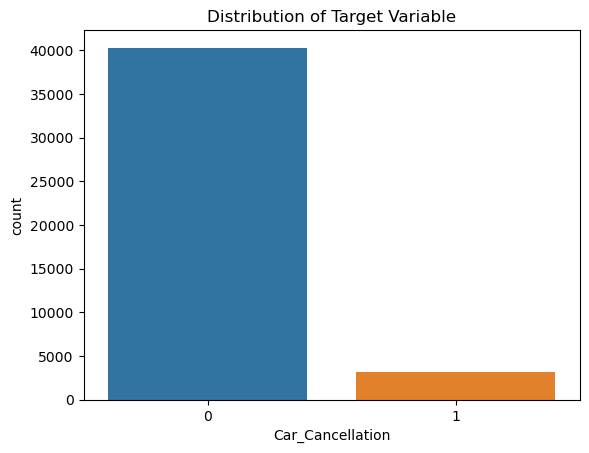

In [4]:
# Visualizing the distribution of Target Variable

sns.countplot(x='Car_Cancellation',data=YC)
plt.title('Distribution of Target Variable')
plt.show()

<Axes: >

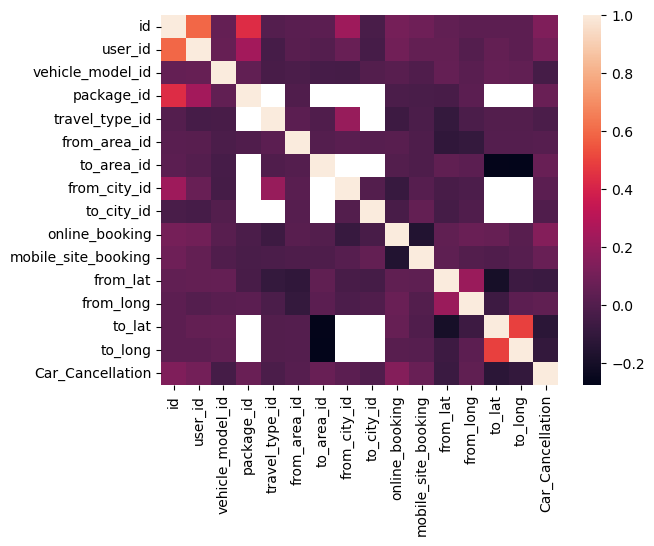

In [5]:
corr = YC.corr()               #Correlation matrix for entire data
sns.heatmap(corr)

In [6]:
# Seperation of Data with respect to Travel Type ID

In [7]:
YC1=YC.loc[YC['travel_type_id']==1]                #Dataset with Travel Type ID 1 
YC1

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,132531,22189,24,NaN,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,132539,22192,54,NaN,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
158,132697,22275,28,NaN,1,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
216,132760,22310,87,NaN,1,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43342,185843,48667,12,NaN,1,393.0,NaN,15.0,191.0,11/23/2013 22:00,1,0,11/23/2013 17:54,13.199560,77.706880,NaN,NaN,0
43385,185889,48697,87,NaN,1,119.0,NaN,15.0,146.0,11/29/2013 14:00,1,0,11/23/2013 23:24,13.047580,77.591840,NaN,NaN,0
43386,185891,48699,12,NaN,1,1281.0,NaN,15.0,32.0,11/24/2013 7:30,1,0,11/23/2013 23:44,12.934634,77.611283,NaN,NaN,0
43393,185899,48704,12,NaN,1,393.0,NaN,15.0,116.0,11/24/2013 10:30,0,0,11/24/2013 7:14,13.199560,77.706880,NaN,NaN,0


In [8]:
#Finding the no. of null values in all columns of set 1

YC1.isnull().sum()            

id                        0
user_id                   0
vehicle_model_id          0
package_id             1589
travel_type_id            0
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
dtype: int64

In [9]:
# Dropping the columns which have MISSING VALUES > 10%

YC1=YC1.drop(['id','user_id','vehicle_model_id','package_id','to_area_id','to_lat','to_long','from_city_id'],axis=1)
YC1.isnull().sum()

travel_type_id          0
from_area_id           88
to_city_id              1
from_date               0
online_booking          0
mobile_site_booking     0
booking_created         0
from_lat               93
from_long              93
Car_Cancellation        0
dtype: int64

In [10]:
YC2=YC.loc[YC['travel_type_id']==2]                   #Dataset with Travel Type ID 2 
YC2

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,185936,30220,12,NaN,2,585.0,1226.0,15.0,NaN,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [11]:
#Finding the no. of null values in all columns of set 2

YC2.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

In [12]:
# Dropping the columns which have MISSING VALUES > 10%

YC2=YC2.drop(['id','user_id','vehicle_model_id','package_id','from_city_id','to_city_id'],axis=1)
YC2.isnull().sum()

travel_type_id         0
from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

In [13]:
YC3=YC.loc[YC['travel_type_id']==3]                         #Dataset with Travel Type ID 3
YC3

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,132535,22190,87,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,132538,21995,12,1.0,3,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,132552,22201,12,1.0,3,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,132569,15846,12,2.0,3,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43415,185924,48719,12,1.0,3,768.0,NaN,15.0,NaN,11/24/2013 16:00,0,1,11/24/2013 12:32,12.989990,77.553320,NaN,NaN,0
43417,185927,41939,12,4.0,3,1390.0,NaN,15.0,NaN,11/24/2013 15:00,0,0,11/24/2013 13:06,12.969368,77.641302,NaN,NaN,0
43420,185930,36265,65,2.0,3,1237.0,NaN,15.0,NaN,11/25/2013 1:00,1,0,11/24/2013 13:54,12.926450,77.612060,NaN,NaN,0
43424,185935,48726,12,2.0,3,515.0,NaN,15.0,NaN,11/24/2013 15:15,0,0,11/24/2013 14:23,12.978960,77.673450,NaN,NaN,0


In [14]:
#Finding the no. of null values in all columns of set 3

YC3.isnull().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
dtype: int64

In [15]:
# Dropping the columns which have MISSING VALUES > 10%

YC3=YC3.drop(['id','user_id','vehicle_model_id','to_area_id','from_city_id','to_city_id','to_lat','to_long'],axis=1)
YC3.isnull().sum()

package_id             0
travel_type_id         0
from_area_id           0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
Car_Cancellation       0
dtype: int64

In [16]:
# filling the null values with the mean of the own column

# Replacing null values of each column which has MISSING VALUE < 5%

col=['from_area_id','from_lat','from_long','to_city_id']
for i in col:
    YC1[i]=YC1[i].fillna(value=YC[i].mode()[0])

In [17]:
# Getting the info of 3 datasets at a time 

YC1.info()
print('-'*100)
YC2.info()
print('-'*100)
YC3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       1589 non-null   int64  
 1   from_area_id         1589 non-null   float64
 2   to_city_id           1589 non-null   float64
 3   from_date            1589 non-null   object 
 4   online_booking       1589 non-null   int64  
 5   mobile_site_booking  1589 non-null   int64  
 6   booking_created      1589 non-null   object 
 7   from_lat             1589 non-null   float64
 8   from_long            1589 non-null   float64
 9   Car_Cancellation     1589 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 136.6+ KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 12 columns):
 #   Column       

## Changing the from_date column and booking_created column for all 3 data sets

In [18]:
YC1['from_date']=pd.to_datetime(YC1['from_date'])
YC1['booking_created']=pd.to_datetime(YC1['booking_created'])

In [19]:
YC2['from_date']=pd.to_datetime(YC2['from_date'])
YC2['booking_created']=pd.to_datetime(YC2['booking_created'])

In [20]:
YC3['from_date']=pd.to_datetime(YC3['from_date'])
YC3['booking_created']=pd.to_datetime(YC3['booking_created'])

## Creating the early_booking column from from_date and booking_created 

## And changing them from days format to hours format 

In [21]:
YC1['early_booking'] = (YC1['from_date'] - YC1['booking_created']) / pd.Timedelta(hours=1)

In [22]:
YC2['early_booking'] = (YC2['from_date'] - YC2['booking_created']) / pd.Timedelta(hours=1)

In [23]:
YC3['early_booking'] = (YC3['from_date'] - YC3['booking_created']) / pd.Timedelta(hours=1)

##  Dropping the from_date and booking_created columns from all data sets.
### Because these 2 columns are not requred since we created 'early_booking'.

In [24]:
YC1 = YC1.drop(['from_date','booking_created'],axis=1)
YC2 = YC2.drop(['from_date','booking_created'],axis=1)
YC3 = YC3.drop(['from_date','booking_created'],axis=1)

In [25]:
# Dropping the travel_type_id's from all the data sets because it may cause biasing in predictions.

YC1 = YC1.drop(['travel_type_id'],axis=1)
YC2 = YC2.drop(['travel_type_id'],axis=1)          
YC3 = YC3.drop(['travel_type_id'],axis=1)

### Importing the required module and functions for distance calculation from Latitude and longitude.

In [26]:
from math import radians,cos,sin,asin,sqrt      

In [27]:
# Calculating the Distance from latitude and longitude for 2nd data set



def distance(lat1,lat2,long1,long2):
    
    lon1 = radians(long1)
    lon2 = radians(long2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a)) 
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [28]:
# Transforming latitude and logitudes into distances.

L1=np.array(YC2['from_lat'])
L2=np.array(YC2['to_lat'])
l1=np.array(YC2['from_long'])
l2=np.array(YC2['to_long'])

D=[]

for i in range(YC2.shape[0]):
    d=distance(L1[i],L2[i],l1[i],l2[i])
    D.append(d)




D=np.array(D)
D

array([ 3.97576441, 13.99503337, 12.70841376, ..., 21.34560281,
        4.59439291, 25.55219277])

In [29]:
# Creating Distance column and dropping the latitude and longitude columns

YC2['Distance'] = D

YC2 = YC2.drop(['from_lat','to_lat','from_long','to_long'],axis=1)

YC2

,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,early_booking,Distance
0,83.0,448.0,0,0,0,0.350000,3.975764
1,1010.0,540.0,0,0,0,6.583333,13.995033
2,1301.0,1034.0,0,0,0,0.366667,12.708414
3,768.0,398.0,0,0,0,1.100000,9.525153
4,1365.0,849.0,0,0,0,1.116667,14.699782
...,...,...,...,...,...,...,...
43425,585.0,1226.0,0,1,0,9.600000,12.174196
43426,1147.0,452.0,1,0,0,3.583333,10.711968
43427,393.0,466.0,1,0,0,34.500000,21.345603
43429,1263.0,542.0,0,0,0,1.283333,4.594393


## Seperating the Feature columns and Target columns from all the data sets

In [30]:
X1 = YC1.drop('Car_Cancellation', axis=1)
y1 = YC1['Car_Cancellation']

In [31]:
X2 = YC2.drop('Car_Cancellation', axis=1)
y2 = YC2['Car_Cancellation']

In [32]:
X3 = YC3.drop('Car_Cancellation', axis=1)
y3 = YC3['Car_Cancellation']

## Treating the imbalance Target Columns with SMOTE

In [33]:
smote = SMOTE(random_state=42)
X1, y1 = smote.fit_resample(X1, y1)

In [34]:
smote = SMOTE(random_state=42)
X2, y2 = smote.fit_resample(X2, y2)

In [35]:
smote = SMOTE(random_state=42)
X3, y3 = smote.fit_resample(X3, y3)

# Treating the Outliers

In [36]:
col1=X1.columns
col2=X2.columns
col3=X3.columns

In [37]:
def outlier(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    IQR = Q3 - Q1
    
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    
    column = column.apply(lambda x : UL if x>UL else LL if x<LL else x)
    return column
X1[col1] = X1[col1].apply(outlier)
X2[col2] = X2[col2].apply(outlier)
X3[col3] = X3[col3].apply(outlier)

In [38]:
# Importing the requred libraries for model making

In [39]:
%matplotlib inline
import time
import random
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
# Splitting the data sets into training and testing sets

In [41]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.25,random_state=40)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.25,random_state=40)
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.25,random_state=40)

# Feature Scaling using Standard Scaler

In [42]:
scaler = StandardScaler()

In [43]:
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [44]:
scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [45]:
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

## Modelling with Cross-Validation using RandomForestClassifier

## MODEL - 1
  - Creating the model with data set 1, where travel_type_id = 1 

In [46]:
rf=RandomForestClassifier(random_state = 40)

In [47]:
# Parameter Tuning for data set 1 and training it using GridSearchCV

h_param = {'max_depth':[2,3,4,5],
           'n_estimators': [50,100],
             'bootstrap':[True,False],
             'max_features':['sqrt','log2'],
             'criterion':['gini','entropy']}

rf1 = GridSearchCV(rf,cv=10,param_grid=h_param,n_jobs=-1)  

rf1.fit(X1_train,y1_train)
print('Best Parameters using Grid search: \n',rf1.best_params_)

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [48]:
# prediction for data set 1 using testing data

predic1 =rf1.predict(X1_test)

In [49]:
# Confusion matrix for testing data and predicted data

confusion_matrix(y1_test,predic1)

array([[367,  40],
       [ 16, 361]], dtype=int64)

In [50]:
# accuracy score for Testing Data

accuracy1= rf1.score(X1_test,y1_test)

In [51]:
accuracy1

0.9285714285714286

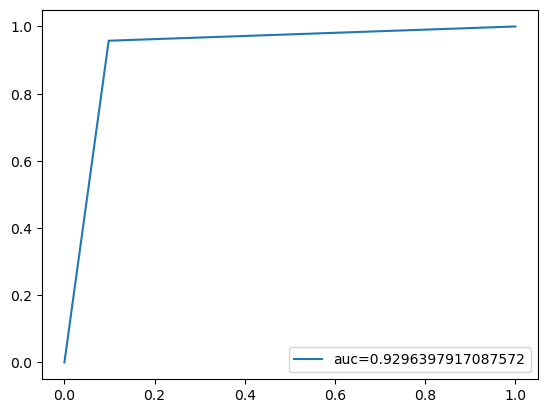

In [52]:
# roc_curve for data set 1 with auc_score


fpr, tpr, _ = roc_curve(y1_test,  predic1)
auc = roc_auc_score(y1_test, predic1)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [53]:
# Classification report for tesing data set

print(classification_report(y1_test,predic1))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       407
           1       0.90      0.96      0.93       377

    accuracy                           0.93       784
   macro avg       0.93      0.93      0.93       784
weighted avg       0.93      0.93      0.93       784



## MODEL - 2
  - Creating the model with data set 2, where travel_type_id = 2 

In [54]:
# Parameter Tuning for data set 2 and training it using GridSearchCV

h_param = {'max_depth':[2,3,4,5],
           'n_estimators': [100, 200],
             'bootstrap':[True,False],
             'max_features':['sqrt','log2'],
             'criterion':['gini','entropy']}

rf2 = GridSearchCV(rf,cv=10,param_grid=h_param,n_jobs=-1)

rf2.fit(X2_train,y2_train)
print('Best Parameters using Grid search: \n',rf2.best_params_)

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [55]:
# prediction for data set 2 using testing data

predic2 =rf2.predict(X2_test)

In [56]:
# Confusion matrix for testing data and predicted data

confusion_matrix(y2_test,predic2)

array([[5160, 2734],
       [1668, 6197]], dtype=int64)

In [57]:
# accuracy score for Testing Data

accuracy2= rf2.score(X2_test,y2_test)

In [58]:
accuracy2

0.7206675550479091

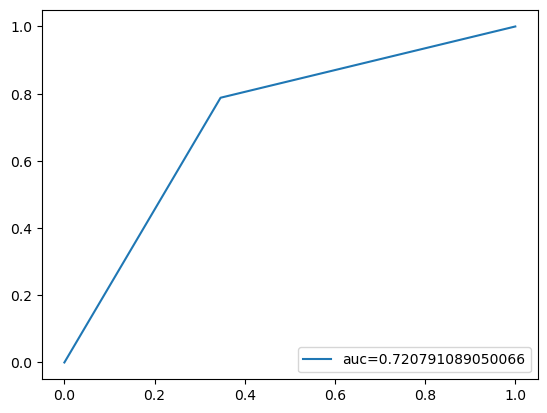

In [59]:
# roc_curve for data set 2 with auc_score

fpr, tpr, _ = roc_curve(y2_test,  predic2)
auc = roc_auc_score(y2_test, predic2)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [60]:
# Classification report for tesing data set

print(classification_report(y2_test,predic2))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      7894
           1       0.69      0.79      0.74      7865

    accuracy                           0.72     15759
   macro avg       0.72      0.72      0.72     15759
weighted avg       0.72      0.72      0.72     15759



## MODEL - 3
  - Creating the model with data set 3, where travel_type_id = 3 

In [61]:
# Parameter Tuning for data set 3 and training it using GridSearchCV

h_param = {'max_depth':[2,3,4,5],
           'n_estimators': [50, 100, 200],
             'bootstrap':[True,False],
             'max_features':['sqrt','log2'],
             'criterion':['gini','entropy']}

rf3 = GridSearchCV(rf,cv=10,param_grid=h_param,n_jobs=-1)

rf3.fit(X3_train,y3_train)
print('Best Parameters using Grid search: \n',rf3.best_params_)

Best Parameters using Grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [62]:
# prediction for data set 3 using testing data

predic3 =rf3.predict(X3_test)

In [63]:
# Confusion matrix for testing data and predicted data


confusion_matrix(y3_test,predic3)

array([[1342,  470],
       [ 307, 1488]], dtype=int64)

In [64]:
# accuracy score for Testing Data

accuracy3= rf3.score(X3_test,y3_test)

In [65]:
accuracy3

0.7845855281397283

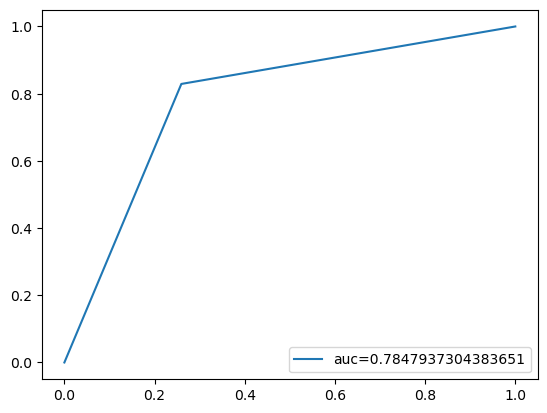

In [66]:
# roc_curve for data set 3 with auc_score

fpr, tpr, _ = roc_curve(y3_test,  predic3)
auc = roc_auc_score(y3_test, predic3)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [67]:
# Classification report for tesing data set

print(classification_report(y3_test,predic3))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78      1812
           1       0.76      0.83      0.79      1795

    accuracy                           0.78      3607
   macro avg       0.79      0.78      0.78      3607
weighted avg       0.79      0.78      0.78      3607

